<a href="https://colab.research.google.com/github/Lin8823/Lin/blob/main/NN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Input, Dense, SimpleRNN, RNN
from keras.layers import LSTM
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/Lin8823/Lin/main/Data/heart.csv

--2022-01-18 17:14:28--  https://raw.githubusercontent.com/Lin8823/Lin/main/Data/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0s      

2022-01-18 17:14:28 (50.3 MB/s) - ‘heart.csv’ saved [11328/11328]



In [ ]:
heart = pd.read_csv("heart.csv", encoding="utf-8")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
MinMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1)) #使用Min-Max Normalization將data標準化至0-1間
MinMax_data = MinMaxScaler.fit_transform(heart)
heart = pd.DataFrame(MinMax_data, columns=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


###將患有與未患有心血管疾病的資料分割

In [ ]:
heart_disease = heart.iloc[0:165]
non_disease = heart.iloc[165:]

In [ ]:
feature_heart_disease = heart_disease.drop("num",axis=1)
feature_non_disease = non_disease.drop("num",axis=1)
target_heart = heart["num"]
# heart_train,heart_test,heart1_train,heart1_test = train_test_split(feature_heart,target_heart,test_size=0.20,random_state=0)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encode', OneHotEncoder(), [0])], remainder='passthrough') #transformers[(名字，方式，要取代的欄位)=>使用tuple呈現，再用list包著，remainder=>其他的欄位]
y = np.array(ct.fit_transform(pd.DataFrame(target_heart))) #使用fit_transform將fit和transform同時完成
#[0,1]代表患有心血管疾病、[1,0]則無

###將目標變數切割

In [ ]:
target_heart_disease = y[0:165]
target_non_disease = y[165:]

In [ ]:
def plot_the_loss_curve(epochs, mse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [ ]:
for disease_index, non_disease_index in zip(kf.split(feature_heart_disease), kf.split(feature_non_disease)):
  print("disease_index：\t",disease_index, "\nnon_disease_index：\t",non_disease_index)

Epoch 1/40
121/121 [==============================] - 1s 2ms/step - loss: 0.6882 - binary_accuracy: 0.5744
Epoch 2/40
121/121 [==============================] - 0s 2ms/step - loss: 0.6233 - binary_accuracy: 0.7355
Epoch 3/40
121/121 [==============================] - 0s 2ms/step - loss: 0.5241 - binary_accuracy: 0.7934
Epoch 4/40
121/121 [==============================] - 0s 1ms/step - loss: 0.4532 - binary_accuracy: 0.8017
Epoch 5/40
121/121 [==============================] - 0s 1ms/step - loss: 0.4192 - binary_accuracy: 0.8099
Epoch 6/40
121/121 [==============================] - 0s 2ms/step - loss: 0.3975 - binary_accuracy: 0.8182
Epoch 7/40
121/121 [==============================] - 0s 2ms/step - loss: 0.3820 - binary_accuracy: 0.8264
Epoch 8/40
121/121 [==============================] - 0s 1ms/step - loss: 0.3665 - binary_accuracy: 0.8430
Epoch 9/40
121/121 [==============================] - 0s 2ms/step - loss: 0.3588 - binary_accuracy: 0.8430
Epoch 10/40
121/121 [================

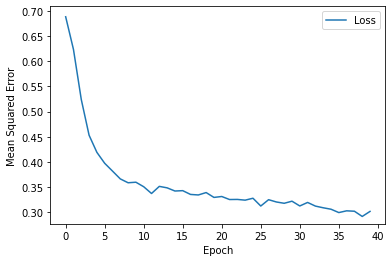

2/2 [==============================] - 0s 7ms/step - loss: 0.4491 - binary_accuracy: 0.8361
Test loss: 0.44910159707069397
Test accuracy: 0.8360655903816223
Epoch 1/40
121/121 [==============================] - 1s 1ms/step - loss: 0.6407 - binary_accuracy: 0.6736
Epoch 2/40
121/121 [==============================] - 0s 2ms/step - loss: 0.5263 - binary_accuracy: 0.7686
Epoch 3/40
121/121 [==============================] - 0s 2ms/step - loss: 0.4626 - binary_accuracy: 0.7934
Epoch 4/40
121/121 [==============================] - 0s 2ms/step - loss: 0.4415 - binary_accuracy: 0.7810
Epoch 5/40
121/121 [==============================] - 0s 1ms/step - loss: 0.4255 - binary_accuracy: 0.8058
Epoch 6/40
121/121 [==============================] - 0s 1ms/step - loss: 0.4213 - binary_accuracy: 0.8223
Epoch 7/40
121/121 [==============================] - 0s 1ms/step - loss: 0.4071 - binary_accuracy: 0.8264
Epoch 8/40
121/121 [==============================] - 0s 2ms/step - loss: 0.4096 - binary_accu

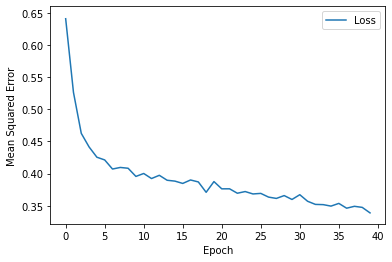

2/2 [==============================] - 0s 5ms/step - loss: 0.3718 - binary_accuracy: 0.8852
Test loss: 0.37177813053131104
Test accuracy: 0.8852459192276001
Epoch 1/40
121/121 [==============================] - 1s 1ms/step - loss: 0.6848 - binary_accuracy: 0.5826
Epoch 2/40
121/121 [==============================] - 0s 1ms/step - loss: 0.5819 - binary_accuracy: 0.7025
Epoch 3/40
121/121 [==============================] - 0s 1ms/step - loss: 0.4960 - binary_accuracy: 0.7603
Epoch 4/40
121/121 [==============================] - 0s 1ms/step - loss: 0.4432 - binary_accuracy: 0.7810
Epoch 5/40
121/121 [==============================] - 0s 2ms/step - loss: 0.4081 - binary_accuracy: 0.8347
Epoch 6/40
121/121 [==============================] - 0s 1ms/step - loss: 0.3934 - binary_accuracy: 0.8058
Epoch 7/40
121/121 [==============================] - 0s 2ms/step - loss: 0.3895 - binary_accuracy: 0.8182
Epoch 8/40
121/121 [==============================] - 0s 2ms/step - loss: 0.3797 - binary_accu

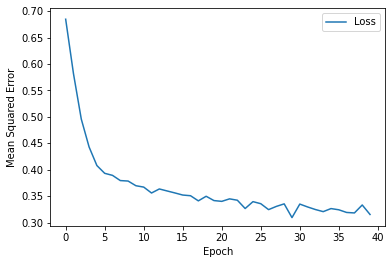

2/2 [==============================] - 0s 7ms/step - loss: 0.4452 - binary_accuracy: 0.8033
Test loss: 0.4452279806137085
Test accuracy: 0.8032786846160889
Epoch 1/40
122/122 [==============================] - 1s 2ms/step - loss: 0.6760 - binary_accuracy: 0.5638
Epoch 2/40
122/122 [==============================] - 0s 2ms/step - loss: 0.5946 - binary_accuracy: 0.7078
Epoch 3/40
122/122 [==============================] - 0s 2ms/step - loss: 0.5133 - binary_accuracy: 0.7901
Epoch 4/40
122/122 [==============================] - 0s 2ms/step - loss: 0.4502 - binary_accuracy: 0.8107
Epoch 5/40
122/122 [==============================] - 0s 2ms/step - loss: 0.4077 - binary_accuracy: 0.8066
Epoch 6/40
122/122 [==============================] - 0s 1ms/step - loss: 0.4161 - binary_accuracy: 0.8189
Epoch 7/40
122/122 [==============================] - 0s 2ms/step - loss: 0.4110 - binary_accuracy: 0.8354
Epoch 8/40
122/122 [==============================] - 0s 1ms/step - loss: 0.3883 - binary_accur

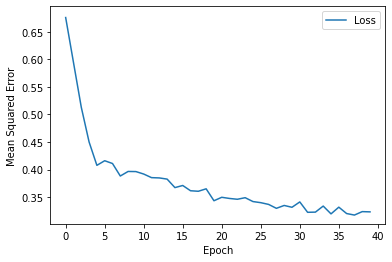

2/2 [==============================] - 0s 6ms/step - loss: 0.3817 - binary_accuracy: 0.8833
Test loss: 0.38173797726631165
Test accuracy: 0.8833333253860474
Epoch 1/40
122/122 [==============================] - 1s 2ms/step - loss: 0.6711 - binary_accuracy: 0.6029
Epoch 2/40
122/122 [==============================] - 0s 2ms/step - loss: 0.6030 - binary_accuracy: 0.7449
Epoch 3/40
122/122 [==============================] - 0s 2ms/step - loss: 0.5355 - binary_accuracy: 0.7654
Epoch 4/40
122/122 [==============================] - 0s 2ms/step - loss: 0.4497 - binary_accuracy: 0.8066
Epoch 5/40
122/122 [==============================] - 0s 2ms/step - loss: 0.3952 - binary_accuracy: 0.8189
Epoch 6/40
122/122 [==============================] - 0s 2ms/step - loss: 0.3656 - binary_accuracy: 0.8313
Epoch 7/40
122/122 [==============================] - 0s 1ms/step - loss: 0.3574 - binary_accuracy: 0.8436
Epoch 8/40
122/122 [==============================] - 0s 1ms/step - loss: 0.3461 - binary_accu

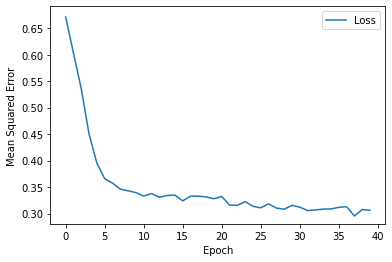

2/2 [==============================] - 0s 8ms/step - loss: 0.6511 - binary_accuracy: 0.7500
Test loss: 0.6510881781578064
Test accuracy: 0.75
[0.8360655903816223, 0.8852459192276001, 0.8032786846160889, 0.8833333253860474, 0.75]


0.8315847039222717

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
test_score_list = []
for disease_index, non_disease_index in zip(kf.split(feature_heart_disease), kf.split(feature_non_disease)):
  heart_disease_train, heart_disease_test = feature_heart_disease.iloc[disease_index[0]], feature_heart_disease.iloc[disease_index[1]]
  heart_disease1_train, heart_disease1_test = target_heart_disease[disease_index[0]], target_heart_disease[disease_index[1]]
  non_disease_train, non_disease_test = feature_non_disease.iloc[non_disease_index[0]], feature_non_disease.iloc[non_disease_index[1]]
  non_disease1_train, non_disease1_test = target_non_disease[non_disease_index[0]], target_non_disease[non_disease_index[1]]

  heart_train = pd.concat([heart_disease_train, non_disease_train])
  heart_test = pd.concat([heart_disease_test, non_disease_test])
  heart1_train = np.vstack([heart_disease1_train,non_disease1_train])
  heart1_test = np.vstack([heart_disease1_test,non_disease1_test])

  # print("heart_train：\t",heart_train, "\nheart1_train：\t",heart1_train, "\nheart_test：\t",heart_test, "\nheart1_test：\t",heart1_test)

  inputs = keras.Input(shape=(13))
  dense = layers.Dense(8, activation="relu")(inputs) #(input+output)/2 -> (13+2)/2
  x = layers.Dense(5, activation="relu")(dense)
  outputs = layers.Dense(2,activation="softmax")(x) #若為一多分類問題，如三個分類，在最後一個Dense層中使用3個單位（每個類一個）使用分類交叉熵損失以及softmax激活
  model = keras.Model(inputs=inputs, outputs=outputs, name="NN")
  model.compile(
      # loss=keras.losses.SparseCategoricalCrossentropy(),
      # loss="binary_crossentropy", # binary_crossentropy使用於二元分類問題，sigmoid函数将logit值映射到0到1之間的範圍内
      loss=keras.losses.CategoricalCrossentropy(),
      # optimizer=tf.keras.optimizers.SGD(learning_rate=0.08, name="SGD"),
      optimizer=keras.optimizers.RMSprop(learning_rate=0.003),
      metrics=["binary_accuracy"]
      # metrics=[tf.keras.metrics.AUC()]
      # metrics=["sparse_categorical_accuracy"]
      # metrics = tfa.metrics.F1Score(num_classes=2)
  )

  history = model.fit(heart_train, heart1_train, batch_size=2, epochs=40) #batch size指訓練多少樣本更新一次權重
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  mse = hist["loss"]
  plot_the_loss_curve(epochs, mse)
  test_scores = model.evaluate(heart_test, heart1_test)
  test_score_list.append(test_scores[1])
  print("Test loss:", test_scores[0])
  print("Test accuracy:", test_scores[1])
print(test_score_list)
np.mean(test_score_list)

#SMOTE

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
# Original dataset shape Counter({1: 900, 0: 100})
sm = SMOTE(random_state=4)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))
# Resampled dataset shape Counter({0: 900, 1: 900})

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 900, 1: 900})


##K-Fold

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

train：	 [ 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302] 
test：	 [

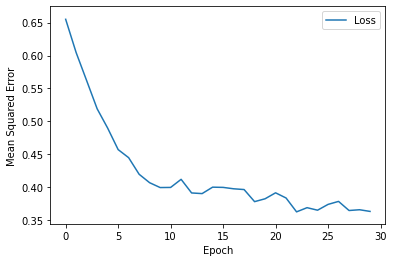

2/2 [==============================] - 0s 11ms/step - loss: 0.1716 - binary_accuracy: 0.9672
Test loss: 0.1715710461139679
Test accuracy: 0.9672130942344666
train：	 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266

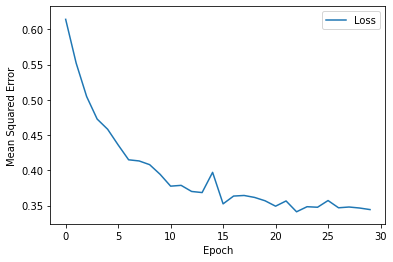

2/2 [==============================] - 0s 4ms/step - loss: 0.3712 - binary_accuracy: 0.8525
Test loss: 0.3712030351161957
Test accuracy: 0.8524590134620667
train：	 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 

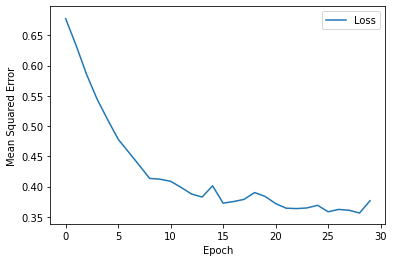

2/2 [==============================] - 0s 7ms/step - loss: 0.4461 - binary_accuracy: 0.8033
Test loss: 0.4460602402687073
Test accuracy: 0.8032786846160889
train：	 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 

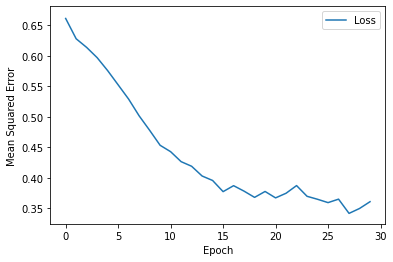

2/2 [==============================] - 0s 4ms/step - loss: 0.7550 - binary_accuracy: 0.6000
Test loss: 0.7550313472747803
Test accuracy: 0.6000000238418579
train：	 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 

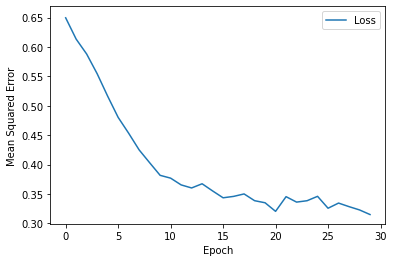

2/2 [==============================] - 0s 7ms/step - loss: 0.8161 - binary_accuracy: 0.6333
Test loss: 0.8160666227340698
Test accuracy: 0.6333333253860474
[0.9672130942344666, 0.8524590134620667, 0.8032786846160889, 0.6000000238418579, 0.6333333253860474]


0.7712568283081055

In [ ]:
test_score_list = []
for train_index, test_index in kf.split(heart):
  heart_train, heart_test = feature_heart.iloc[train_index], feature_heart.iloc[test_index]
  heart1_train, heart1_test = y[train_index], y[test_index]
  # print("TRAIN:", heart_train, heart1_train, "\nTEST:", heart_test, heart1_test)
  print("train：\t",train_index, "\ntest：\t",test_index)
  inputs = keras.Input(shape=(13))
  dense = layers.Dense(8, activation="relu")(inputs) #(input+output)/2 -> (13+2)/2
  x = layers.Dense(5, activation="relu")(dense)
  outputs = layers.Dense(2,activation="softmax")(x) #若為一多分類問題，如三個分類，在最後一個Dense層中使用3個單位（每個類一個）使用分類交叉熵損失以及softmax激活
  model = keras.Model(inputs=inputs, outputs=outputs, name="NN")
  model.compile(
      # loss=keras.losses.SparseCategoricalCrossentropy(),
      # loss="binary_crossentropy", # binary_crossentropy使用於二元分類問題，sigmoid函数将logit值映射到0到1之間的範圍内
      loss=keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.SGD(learning_rate=0.08, name="SGD"),
      # optimizer=keras.optimizers.RMSprop(learning_rate=0.003),
      metrics=["binary_accuracy"]
      # metrics=["sparse_categorical_accuracy"]
  )

  history = model.fit(heart_train, heart1_train, batch_size=10, epochs=30) #batch size指訓練多少樣本更新一次權重
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  mse = hist["loss"]
  plot_the_loss_curve(epochs, mse)
  test_scores = model.evaluate(heart_test, heart1_test)
  test_score_list.append(test_scores[1])
  print("Test loss:", test_scores[0])
  print("Test accuracy:", test_scores[1])
print(test_score_list)
np.mean(test_score_list)

train：	 [  0   1   3   4   5   7   9  10  11  12  14  15  16  17  18  19  20  21
  22  23  24  27  29  30  31  32  33  35  36  37  38  40  41  42  44  45
  46  47  49  51  52  54  55  56  57  58  59  60  61  62  63  65  66  67
  68  70  71  72  73  76  78  79  80  81  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 103 104 105 106 107 109 110
 113 114 117 118 119 120 121 122 123 124 125 127 128 129 130 131 133 134
 135 137 138 139 140 141 142 143 145 146 147 148 149 150 151 152 154 155
 156 157 159 160 161 162 163 164 166 167 168 169 170 171 173 174 176 177
 178 180 181 183 184 185 186 187 189 190 191 192 193 196 197 198 199 200
 201 203 204 206 207 208 210 211 212 213 214 216 217 218 219 221 222 223
 224 225 227 228 229 230 231 232 233 234 236 237 238 239 240 241 242 243
 244 246 247 248 249 250 251 255 257 258 259 260 263 264 265 266 267 268
 269 270 271 272 273 274 276 277 280 282 283 285 286 287 288 289 290 291
 292 293 294 295 297 298 300 302] 
test：	 [

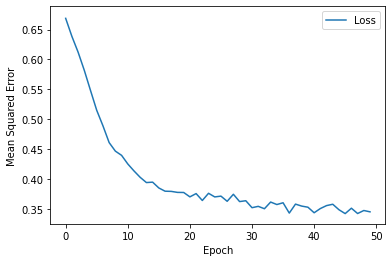

2/2 [==============================] - 0s 6ms/step - loss: 0.4199 - binary_accuracy: 0.8525
Test loss: 0.4198806583881378
Test accuracy: 0.8524590134620667
train：	 [  0   1   2   3   5   6   7   8  11  13  14  15  17  18  19  22  23  24
  25  26  27  28  29  30  31  32  34  36  38  39  41  43  44  45  47  48
  49  50  51  52  53  54  55  58  59  60  62  63  64  66  67  68  69  71
  72  74  75  76  77  78  79  80  82  87  89  90  91  92  93  94  95  96
  97 102 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 141 142 144 145 147 148 149 151 152 153 154 155 156 158 159 160 161
 162 163 164 165 166 167 169 170 171 172 173 174 175 176 177 179 180 181
 182 183 185 186 187 188 189 191 193 194 195 197 198 200 202 203 204 205
 206 207 208 209 210 214 215 216 217 218 220 221 222 223 224 225 226 227
 228 229 230 232 233 234 235 236 239 240 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 259 

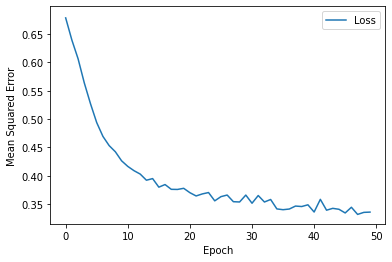

2/2 [==============================] - 0s 6ms/step - loss: 0.3960 - binary_accuracy: 0.8033
Test loss: 0.395975261926651
Test accuracy: 0.8032786846160889
train：	 [  0   2   4   6   7   8   9  10  11  12  13  14  15  16  17  19  20  21
  22  24  25  26  27  28  31  32  33  34  35  37  38  39  40  41  42  43
  44  46  47  48  49  50  52  53  54  55  56  57  58  59  60  61  63  64
  65  66  68  69  70  71  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  91  92  94  95  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 120 122 126 129 132 133 134
 135 136 138 139 140 141 142 143 144 145 146 147 150 152 153 154 157 158
 161 162 164 165 166 167 168 169 171 172 174 175 176 178 179 181 182 183
 184 185 186 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 225 226 227 228 229 230 231 232 235 236 237 238 239 241 242 243
 245 246 250 251 252 253 254 256 2

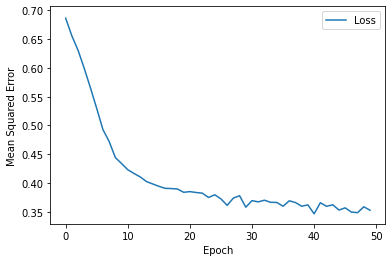

2/2 [==============================] - 0s 5ms/step - loss: 0.3508 - binary_accuracy: 0.8852
Test loss: 0.3507806658744812
Test accuracy: 0.8852459192276001
train：	 [  0   1   2   3   4   5   6   7   8   9  10  12  13  16  18  20  21  22
  23  24  25  26  28  29  30  32  33  34  35  36  37  38  39  40  41  42
  43  45  46  47  48  50  51  53  54  55  56  57  59  60  61  62  63  64
  65  66  67  69  70  72  73  74  75  77  78  79  80  81  82  83  84  85
  86  87  88  90  93  96  97  98  99 100 101 102 103 104 107 108 111 112
 113 115 116 117 118 119 120 121 123 124 125 126 127 128 129 130 131 132
 133 135 136 137 139 140 142 143 144 146 148 149 150 151 153 154 155 156
 157 158 159 160 161 163 165 167 168 170 171 172 173 174 175 176 177 178
 179 180 182 183 184 185 186 187 188 189 190 192 194 195 196 197 199 201
 202 204 205 209 210 211 212 213 215 216 217 218 219 220 221 223 224 226
 228 230 231 233 234 235 236 237 238 239 240 241 244 245 246 247 248 249
 251 252 253 254 255 256 257 258 

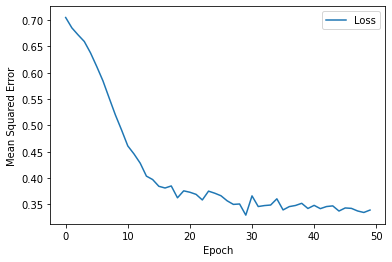

2/2 [==============================] - 0s 4ms/step - loss: 0.4330 - binary_accuracy: 0.8333
Test loss: 0.4329913556575775
Test accuracy: 0.8333333134651184
train：	 [  1   2   3   4   5   6   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  23  25  26  27  28  29  30  31  33  34  35  36  37  39  40  42
  43  44  45  46  48  49  50  51  52  53  56  57  58  61  62  64  65  67
  68  69  70  71  72  73  74  75  76  77  81  82  83  84  85  86  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 105 106 108 109
 110 111 112 114 115 116 118 119 120 121 122 123 124 125 126 127 128 130
 131 132 134 136 137 138 140 141 143 144 145 146 147 148 149 150 151 152
 153 155 156 157 158 159 160 162 163 164 165 166 168 169 170 172 173 175
 177 178 179 180 181 182 184 187 188 190 191 192 193 194 195 196 198 199
 200 201 202 203 205 206 207 208 209 211 212 213 214 215 219 220 222 223
 224 225 226 227 229 231 232 233 234 235 237 238 240 241 242 243 244 245
 247 248 249 250 252 253 254 255 

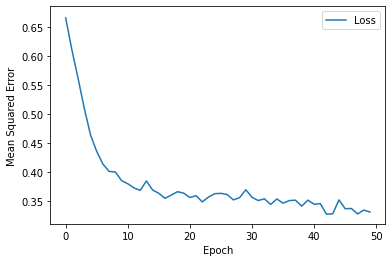

2/2 [==============================] - 0s 7ms/step - loss: 0.3890 - binary_accuracy: 0.8333
Test loss: 0.3890361785888672
Test accuracy: 0.8333333134651184
[0.8524590134620667, 0.8032786846160889, 0.8852459192276001, 0.8333333134651184, 0.8333333134651184]


0.8415300488471985

In [ ]:
test_score_list = []
for train_index, test_index in kf.split(heart):
  heart_train, heart_test = feature_heart.iloc[train_index], feature_heart.iloc[test_index]
  heart1_train, heart1_test = y[train_index], y[test_index]
  # print("TRAIN:", heart_train, heart1_train, "\nTEST:", heart_test, heart1_test)
  print("train：\t",train_index, "\ntest：\t",test_index)
  inputs = keras.Input(shape=(13))
  dense = layers.Dense(8, activation="relu")(inputs) #(input+output)/2 -> (13+2)/2
  x = layers.Dense(5, activation="relu")(dense)
  outputs = layers.Dense(2,activation="softmax")(x) #若為一多分類問題，如三個分類，在最後一個Dense層中使用3個單位（每個類一個）使用分類交叉熵損失以及softmax激活
  model = keras.Model(inputs=inputs, outputs=outputs, name="NN")
  model.compile(
      # loss=keras.losses.SparseCategoricalCrossentropy(),
      # loss="binary_crossentropy", # binary_crossentropy使用於二元分類問題，sigmoid函数将logit值映射到0到1之間的範圍内
      loss=keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.SGD(learning_rate=0.03, name="SGD"),
      # optimizer=keras.optimizers.RMSprop(learning_rate=0.003),
      metrics=["binary_accuracy"]
      # metrics=["sparse_categorical_accuracy"]
  )

  history = model.fit(heart_train, heart1_train, batch_size=6, epochs=50) #batch size指訓練多少樣本更新一次權重
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  mse = hist["loss"]
  plot_the_loss_curve(epochs, mse)
  test_scores = model.evaluate(heart_test, heart1_test)
  test_score_list.append(test_scores[1])
  print("Test loss:", test_scores[0])
  print("Test accuracy:", test_scores[1])
print(test_score_list)
np.mean(test_score_list)

In [ ]:
test_score_list = []
for train_index, test_index in kf.split(heart):
  heart_train, heart_test = feature_heart.iloc[train_index], feature_heart.iloc[test_index]
  heart1_train, heart1_test = target_heart.iloc[train_index], target_heart.iloc[test_index]
  # print("TRAIN:", heart_train, heart1_train, "\nTEST:", heart_test, heart1_test)
  print("train：\t",train_index, "\ntest：\t",test_index)
  inputs = keras.Input(shape=(13))
  dense = layers.Dense(8, activation="relu")(inputs) #(input+output)/2 -> (13+2)/2
  x = layers.Dense(5, activation="relu")(dense)
  outputs = layers.Dense(1,activation="sigmoid")(x) 
  # outputs = layers.Dense(2,activation="softmax")(x) #若為一多分類問題，如三個分類，在最後一個Dense層中使用3個單位（每個類一個）使用分類交叉熵損失以及softmax激活
  model = keras.Model(inputs=inputs, outputs=outputs, name="NN")
  model.compile(
      # loss=keras.losses.SparseCategoricalCrossentropy(),
      loss=keras.losses.binary_crossentropy(), # binary_crossentropy使用於二元分類問題，sigmoid函数将logit值映射到0到1之間的範圍内
      # loss=keras.losses.CategoricalCrossentropy(),
      optimizer=keras.optimizers.RMSprop(learning_rate=0.004),
      metrics=["binary_accuracy"]
      # metrics=["sparse_categorical_accuracy"]
  )

  history = model.fit(heart_train, heart1_train, batch_size=10, epochs=50) #batch size指訓練多少樣本更新一次權重
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  mse = hist["loss"]
  plot_the_loss_curve(epochs, mse)
  test_scores = model.evaluate(heart_test, heart1_test)
  test_score_list.append(test_scores[1])
  print("Test loss:", test_scores[0])
  print("Test accuracy:", test_scores[1])
print(test_score_list)
np.mean(test_score_list)

# 非必要不執行

In [ ]:
####非必要不執行model.save("/content/drive/MyDrive/NN_model") #acc = 0.8215 (k-fold=5, RMSprop(learning_rate=0.003), batch_size=2, epochs=40)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/NN_model/assets


In [ ]:
model.save('model.h5') #acc = 0.8215 (k-fold=5, RMSprop(learning_rate=0.003), batch_size=2, epochs=40)

In [ ]:
from google.colab import drive
from keras.models import load_model
model = load_model('/content/drive/MyDrive/NN_model')

In [ ]:
model.predict([[57, 0, 0, 140, 241, 0, 1, 123, 1, 0.2, 1, 0, 3]])

array([[1.000000e+00, 6.609808e-13]], dtype=float32)

In [ ]:
model.predict([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])

array([[9.810737e-12, 1.000000e+00]], dtype=float32)

In [ ]:
model.predict(df1.iloc[-3:,:])

array([[5.7325425e-04, 9.9942672e-01],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [ ]:
columns=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
data = [20, 0, 0, 120, 118, 1, 1, 150, 0, 2.3, 1, 0, 3]
new_data = dict(zip(columns, data))
heart_test = heart.drop("target", axis=1)
df1=heart_test.append(new_data,ignore_index=True)
MinMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1)) #使用Min-Max Normalization將data標準化至0-1間
MinMax_data = MinMaxScaler.fit_transform(df1)
test = pd.DataFrame(MinMax_data, columns=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"])


In [ ]:
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.754386,1.0,1.000000,0.481132,0.257848,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.298246,1.0,0.666667,0.339623,0.295964,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.368421,0.0,0.333333,0.339623,0.192825,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.631579,1.0,0.333333,0.245283,0.264574,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.649123,0.0,0.000000,0.245283,0.529148,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.438596,1.0,1.000000,0.150943,0.327354,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.842105,1.0,0.000000,0.471698,0.168161,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.649123,1.0,0.000000,0.339623,0.029148,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000
302,0.649123,0.0,0.333333,0.339623,0.264574,0.0,0.0,0.786260,0.0,0.000000,0.5,0.25,0.666667


In [ ]:
model.predict(test.iloc[-1:,:])
# model.predict(test)

array([[0.02892663, 0.9710734 ]], dtype=float32)

In [ ]:
heart_test = heart.drop("target", axis=1)
df1=heart_test.append(new_data,ignore_index=True)
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0
302,57.0,0.0,1.0,130.0,236.0,0.0,0.0,174.0,0.0,0.0,1.0,1.0,2.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
data = [20, 0, 0, 120, 118, 1, 1, 150, 0, 2.3, 1, 0, 3]
# cosine_similarity([vec_a], [vec_b])
# df1['similarity']=df1.apply(lambda x: x['age']+3,axis=1)
df1['similarity']=df1.apply(lambda x: float(cosine_similarity([data], [list(x)])),axis=1)
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,similarity
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,0.950693
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,0.959587
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,0.977475
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,0.955723
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,0.877314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.903249
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.962446
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.971845
302,57.0,0.0,1.0,130.0,236.0,0.0,0.0,174.0,0.0,0.0,1.0,1.0,2.0,0.958658


In [ ]:
model.predict(heart_test)

array([[9.6560813e-02, 9.0343916e-01],
       [2.9151630e-01, 7.0848370e-01],
       [2.0964399e-02, 9.7903562e-01],
       [6.0902856e-02, 9.3909711e-01],
       [2.6066372e-02, 9.7393358e-01],
       [1.4447111e-01, 8.5552889e-01],
       [1.2204396e-01, 8.7795603e-01],
       [5.3294878e-02, 9.4670510e-01],
       [5.5952552e-03, 9.9440479e-01],
       [4.7614168e-02, 9.5238584e-01],
       [2.1739636e-01, 7.8260362e-01],
       [3.7596799e-03, 9.9624026e-01],
       [6.3884914e-02, 9.3611509e-01],
       [1.2203745e-01, 8.7796253e-01],
       [1.0679467e-03, 9.9893206e-01],
       [1.7539186e-02, 9.8246080e-01],
       [3.6361734e-03, 9.9636382e-01],
       [8.0456294e-02, 9.1954368e-01],
       [1.7871450e-01, 8.2128543e-01],
       [2.8234998e-02, 9.7176504e-01],
       [5.9617120e-01, 4.0382886e-01],
       [1.9149743e-02, 9.8085028e-01],
       [6.8444937e-02, 9.3155509e-01],
       [4.3008491e-02, 9.5699155e-01],
       [1.9585222e-02, 9.8041475e-01],
       [9.9201508e-02, 9.

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.7.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: opt-einsum, tensorboard, astunparse, wheel, tensorflow-io-gcs-filesystem, keras-preprocessing, tensorflow-estimator, gast, flatbuffers, protobuf, keras, google-pasta, grpcio, absl-py, typing-extensions, wrapt, termcolor, six, h5py, numpy, libclang
Required-by: kapre


###使用平均、中位數做資料預測

In [ ]:
model.predict([[heart['age'].mean(), heart['sex'].median(), heart['cp'].mean(), heart['trestbps'].mean(), heart['chol'].mean(), 
               heart['fbs'].median(), heart['restecg'].median(), heart['thalach'].mean(), heart['exang'].median(), heart['oldpeak'].mean(),
               heart['slope'].median(), heart['ca'].median(), heart['thal'].median()]])

array([[0.41059422, 0.5894058 ]], dtype=float32)

In [ ]:
[heart['age'].mean(), heart['sex'].median(), heart['cp'].mean(), heart['trestbps'].mean(), heart['chol'].mean(), 
               heart['fbs'].median(), heart['restecg'].median(), heart['thalach'].mean(), heart['exang'].median(), heart['oldpeak'].mean(),
               heart['slope'].median(), heart['ca'].median(), heart['thal'].median()]

[54.366336633663366,
 1.0,
 0.966996699669967,
 131.62376237623764,
 246.26402640264027,
 0.0,
 1.0,
 149.64686468646866,
 0.0,
 1.0396039603960396,
 1.0,
 0.0,
 2.0]

In [ ]:
def test(data1):
  result=model.predict([list(data1)])
  diagnoise = print('患有心血管疾病之機率：',result[0])
  return diagnoise
test(feature_non_disease.iloc[0])

患有心血管疾病之機率： [9.9976271e-01 2.3726602e-04]


In [ ]:
keras.backend.clear_session()

# **Neural Network2**

In [ ]:
inputs = keras.Input(shape=(13))
dense = layers.Dense(8, activation="relu")(inputs) #(input+output)/2 -> (13+2)/2
x = layers.Dense(5, activation="relu")(dense)
outputs = layers.Dense(2,activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="NN2")
model.summary()

Model: "NN2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_3 (Dense)             (None, 8)                 112       
                                                                 
 dense_4 (Dense)             (None, 5)                 45        
                                                                 
 dense_5 (Dense)             (None, 2)                 12        
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


#**Neural Network3**

In [ ]:
inputs = keras.Input(shape=(13))
dense = layers.Dense(12, activation="relu")(inputs)
x = layers.Dense(8, activation="relu")(dense)
x = layers.Dense(6, activation="relu")(x)
x = layers.Dense(4, activation="relu")(x)
outputs = layers.Dense(2,activation="relu")(x)
model3 = keras.Model(inputs=inputs, outputs=outputs, name="NN3")
model3.summary()

Model: "NN3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 12)                168       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
Total params: 364
Trainable params: 364
Non-trainable params: 0

### 測試用_使用所有資料做訓練

Epoch 1/150


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


38/38 [==============================] - 1s 2ms/step - loss: 0.6022 - sparse_categorical_accuracy: 0.7030
Epoch 2/150
38/38 [==============================] - 0s 2ms/step - loss: 0.4479 - sparse_categorical_accuracy: 0.7888
Epoch 3/150
38/38 [==============================] - 0s 2ms/step - loss: 0.4179 - sparse_categorical_accuracy: 0.8152
Epoch 4/150
38/38 [==============================] - 0s 2ms/step - loss: 0.3894 - sparse_categorical_accuracy: 0.8152
Epoch 5/150
38/38 [==============================] - 0s 2ms/step - loss: 0.3879 - sparse_categorical_accuracy: 0.8053
Epoch 6/150
38/38 [==============================] - 0s 2ms/step - loss: 0.3771 - sparse_categorical_accuracy: 0.8185
Epoch 7/150
38/38 [==============================] - 0s 1ms/step - loss: 0.3644 - sparse_categorical_accuracy: 0.8383
Epoch 8/150
38/38 [==============================] - 0s 2ms/step - loss: 0.3726 - sparse_categorical_accuracy: 0.8416
Epoch 9/150
38/38 [==============================] - 0s 1ms/step - l

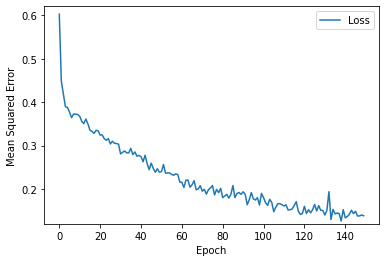

1/1 [==============================] - 0s 145ms/step - loss: 0.1406 - sparse_categorical_accuracy: 1.0000
Test loss: 0.14060218632221222
Test accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # loss="binary_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
    metrics=["sparse_categorical_accuracy"]
)

history = model.fit(feature_heart, target_heart, batch_size=8, epochs=150)

epochs = history.epoch
hist = pd.DataFrame(history.history)
mse = hist["loss"]
plot_the_loss_curve(epochs, mse)

test_scores = model.evaluate(feature_heart.iloc[50:80], target_heart.iloc[50:80])
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])